# Analisis de Integridad de Datos

- En este analisis se quiere ver la distribucion de la base de datos DEIS de Egresos Hospitalarios.
- Estos resultados se quieren contrastar con los datos del tablero DEIS MINSAL y con los datos de GRD.
- Los datos solamente corresponderan al estrato del Torax

In [1]:
import polars as pl
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import funciones_auxiliares_hito_1 as aux
from lectura_archivos import leer_grd

sns.set_style("darkgrid", rc={'figure.figsize': (12, 6)})

In [3]:
torax = leer_grd().filter(pl.col('COD_HOSPITAL') == 112103)
torax_pandas = torax.to_pandas()

## Cantidad de Egresos Hospitalarios

- En este caso, se quiere ver la cantidad de egresos hospitalarios por año

In [4]:
numero_egresos_grd = torax_pandas.groupby("ANIO_EGRESO")["DIAGNOSTICO1"].count()
display(numero_egresos_grd)

ANIO_EGRESO
2019    7529
2020    2853
2021    3086
Name: DIAGNOSTICO1, dtype: int64

## Cantidad de Valores Faltantes

,cantidad_na,porcentaje_na
COD_HOSPITAL,0,0.00
CIP_ENCRIPTADO,0,0.00
SEXO,0,0.00
FECHA_NACIMIENTO,0,0.00
ETNIA,0,0.00
...,...,...
IR_29301_SEVERIDAD,0,0.00
IR_29301_MORTALIDAD,0,0.00
HOSPPROCEDENCIA,8669,64.37
ESTANCIA,0,0.00


,cantidad_na,porcentaje_na
COD_HOSPITAL,0,0.00
CIP_ENCRIPTADO,0,0.00
SEXO,0,0.00
FECHA_NACIMIENTO,0,0.00
ETNIA,0,0.00
PROVINCIA,0,0.00
COMUNA,0,0.00
NACIONALIDAD,0,0.00
PREVISION,0,0.00
SERVICIO_SALUD,0,0.00


,cantidad_na,porcentaje_na
PESORN4,13468,100.00
SEXORN4,13468,100.00
RN4ESTADO,4671,34.68
DIAGNOSTICO1,0,0.00
DIAGNOSTICO2,266,1.98
DIAGNOSTICO3,993,7.37
DIAGNOSTICO4,2364,17.55
DIAGNOSTICO5,4060,30.15
DIAGNOSTICO6,5858,43.50
DIAGNOSTICO7,7591,56.36


,cantidad_na,porcentaje_na
PROCEDIMIENTO13,8818,65.47
PROCEDIMIENTO14,9222,68.47
PROCEDIMIENTO15,9551,70.92
PROCEDIMIENTO16,9843,73.08
PROCEDIMIENTO17,10105,75.03
PROCEDIMIENTO18,10349,76.84
PROCEDIMIENTO19,10592,78.65
PROCEDIMIENTO20,10810,80.26
PROCEDIMIENTO21,11029,81.89
PROCEDIMIENTO22,11243,83.48


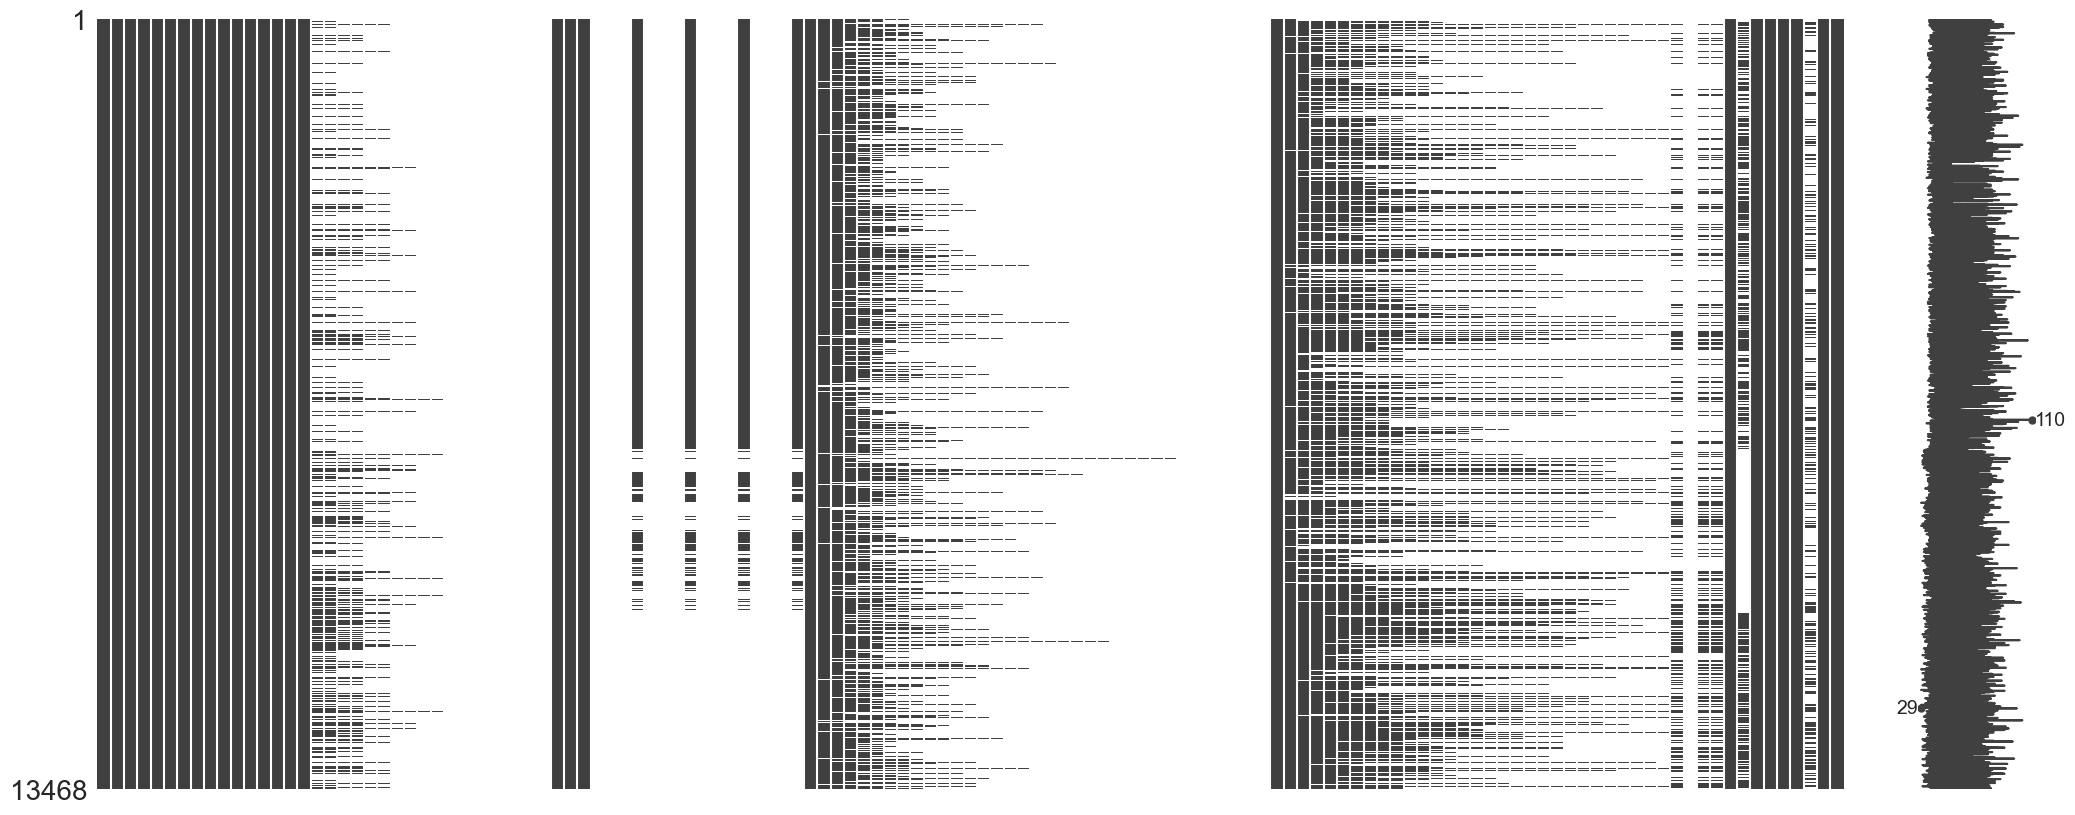

In [7]:
resumen_faltantes = aux.analizar_valores_faltantes(torax_pandas)
display(resumen_faltantes.iloc[:50])
display(resumen_faltantes.iloc[50:100])
display(resumen_faltantes.iloc[100:])

## Cantidad de Dias Estada Totales

ANO_EGRESO
2001    51187
2002    56939
2003    53152
2004    51007
2005    49503
2006    48135
2007    50503
2008    47686
2009    45723
2010    48239
2011    48133
2012    43891
2013    51693
2014    45572
2015    44053
2016    44752
2017    44462
2018    43900
2019    42921
2020    31371
Name: DIAS_ESTADA, dtype: int64

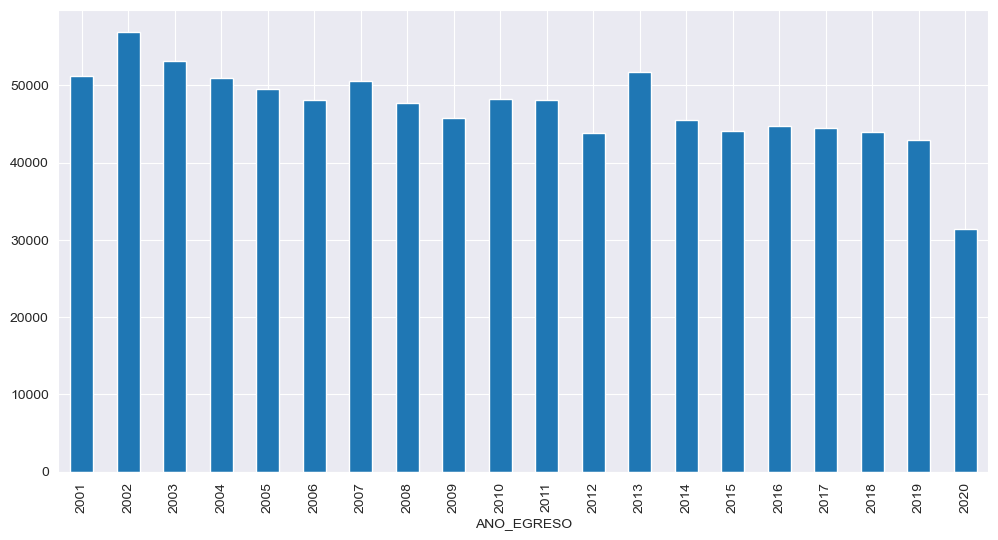

In [53]:
dias_estada_totales = torax_pandas.groupby("ANO_EGRESO")["DIAS_ESTADA"].sum()
display(dias_estada_totales)
dias_estada_totales.plot(kind="bar")
plt.show()